<a href="https://colab.research.google.com/github/krucx/ML_from_scratch/blob/main/Perceptron_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# global variables
boundary = [0.5,-1,0.25]

In [ ]:
def createDataset(theta=[0.5,-1,0.25],n=100):
  X=[]
  Y=[]
  for i in range(n):
    X.append([np.random.rand(), np.random.rand()])
    if X[-1][0]*theta[0] + X[-1][1]*theta[1] + theta[2]>=0:
      Y.append(1)
    else:
      Y.append(-1)
  return X,Y

In [ ]:
def visualize_dataset_with_basis(X,Y,theta,line_color='g'):
  color = ['r' if i==1 else 'b' for i in Y]
  xs=[]
  ys=[]
  for i,j in X:
    xs.append(i)
    ys.append(j)
  plt.scatter(x=xs,y=ys,c=color)
  plt.plot(xs,(-theta[0]*np.array(xs)-theta[2])/theta[1],c=line_color)

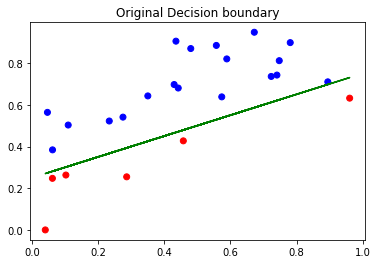

In [ ]:
X_t,Y_t = createDataset(boundary,25)
plt.title('Original Decision boundary')
visualize_dataset_with_basis(X_t,Y_t,boundary)

In [ ]:
X_t = np.array(X_t)
X = np.append(X_t,np.ones((X_t.shape[0],1)),axis=1)
Y = np.array(Y_t)

print(Y.shape)
print(X.shape)

(25,)
(25, 3)


In [ ]:
def shuffle(X,Y):
  m = X.shape[1]
  y = Y.reshape((Y.shape[0],1))
  combined = np.append(X,y,axis=1)
  np.random.shuffle(combined)
  return combined[:,:m],combined[:,m:].reshape(Y.shape[0])

In [ ]:
def hingeloss(X,Y,theta):
  return (-1/X.shape[0])*np.dot(Y,np.dot(X,theta))

In [ ]:
# perceptron is stochastic gradient descent for hinge loss

def perceptron(X,Y,theta,epochs=10):
  loss = []
  for j in range(epochs):
    for i in range(X.shape[0]):
      if Y[i]*np.dot(X[i],theta) <= 0:
        theta = theta + Y[i]*X[i]
        loss.append(hingeloss(X,Y,theta))
  return theta,loss

[ 1.24221068 -2.98157239  1.        ]
-0.5118627203584258


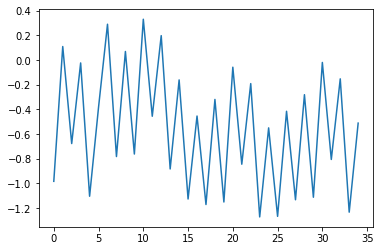

In [ ]:
epochs = 100
X,Y=shuffle(X,Y)
theta = np.zeros(X.shape[1])
theta,loss = perceptron(X,Y,theta,epochs)
print(theta)
print(loss[-1])
plt.plot(range(len(loss)),loss)
plt.show()

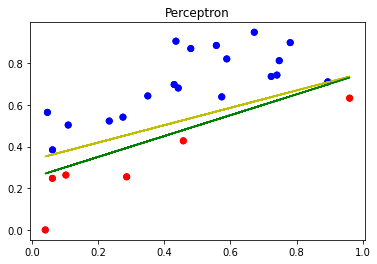

In [ ]:
plt.title('Perceptron')
visualize_dataset_with_basis(X_t,Y_t,theta,'y')
visualize_dataset_with_basis(X_t,Y_t,boundary,'g')